In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import gamma

import pcms.tree

In [2]:
def draw_epl(n_samples, n_leaves):
    epls = []
    for _ in range(n_samples):
        tree = pcms.tree.cbst(n_leaves=n_leaves)
        epls.append(tree.find_epl())
    return np.array(epls)

In [3]:
n_samples = 100000
n_leaves = 200

hist_draw = draw_epl(n_samples=n_samples, n_leaves=n_leaves)
hist_draw = (hist_draw - np.mean(hist_draw))/np.std(hist_draw)

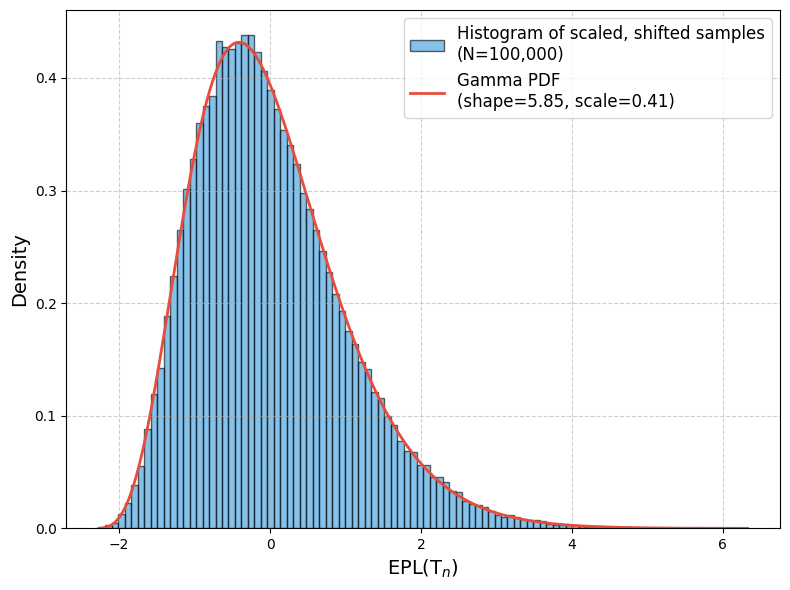

In [4]:
n_bins = 100

# Compute histogram and fit Gamma density
hist, bins = np.histogram(hist_draw, bins=n_bins, density=True)
centers = (bins[:-1] + bins[1:]) / 2
shape, loc, scale = gamma.fit(hist_draw)

# Generate x values for Gamma PDF
xvals = np.linspace(bins[0], bins[-1], 1000)
gamma_pdf = gamma.pdf(xvals, shape, loc=loc, scale=scale)

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))  # Larger figure for better visualization

# Histogram
ax.hist(hist_draw, bins=n_bins, density=True, alpha=0.6, color='#3498db', edgecolor='black',
        label=f"Histogram of scaled, shifted samples\n(N={n_samples:,})")

# Gamma PDF
ax.plot(xvals, gamma_pdf, color='#e74c3c', lw=2, label=f"Gamma PDF\n(shape={shape:.2f}, scale={scale:.2f})")

# Titles and labels
ax.set_xlabel(r'$\mathrm{EPL}(\mathrm{T}_n)$', fontsize=14)
ax.set_ylabel(r'Density', fontsize=14)

# Grid and legend
ax.grid(visible=True, linestyle='--', alpha=0.6)
ax.legend(fontsize=12)

# Tight layout for better spacing
plt.tight_layout()

plt.show()